In [19]:
%matplotlib inline
import torch
import sys
sys.path.append("..")
import d2lzh_pytorch as d2l

features,labels=d2l.get_data_ch7()

def init_adam_states():
    v_w,v_b=torch.zeros((features.shape[1],1),dtype=torch.float32),torch.zeros(1,dtype=torch.float32)
    s_w,s_b=torch.zeros((features.shape[1],1),dtype=torch.float32),torch.zeros(1,dtype=torch.float32)
    return ((v_w,s_w),(v_b,s_b))

def adam(params,states,hyperparams):
    beta1,beta2,eps=0.9,0.999,1e-6
    for p,(v,s) in zip(params,states):
        v[:]=beta1*v+(1-beta1)*p.grad.data
        s[:]=beta2*s+(1-beta2)*p.grad.data**2
        v_bias_corr=v/(1-beta1**hyperparams['t'])
        s_bias_corr=s/(1-beta2**hyperparams['t'])
        p.data-=hyperparams['lr']*v_bias_corr/(torch.sqrt(s_bias_corr)+eps)
    hyperparams['t']+=1
    

loss:0.242527,0.156253 sec per epoch


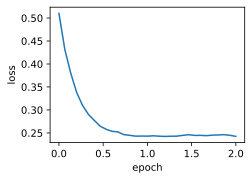

In [20]:
d2l.train_ch7(adam,init_adam_states(),{'lr':0.01,'t':1},features,labels)

loss:0.243086,0.090746 sec per


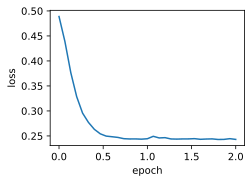

In [21]:
d2l.train_pytorch_ch7(torch.optim.Adam,{'lr':0.01},features,labels)